# Analysing the $mBasicPH\_storage$ model

## Settings

For working with the model, we first import some packages and the modelclass:

In [1]:
# In case, working directory is not set correctly
#os.chdir('C:\\Users\\mpher\\Documents\\Uni\\Master\\02_Exchange\\01_Academics\\Energy Economics of the Green Transition\\0_Final Project\EnergyEconGroupWork')

In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

c:\Users\mpher\Documents\Uni\Master\02_Exchange\01_Academics\Energy Economics of the Green Transition\EnergyEconGroupWork


In [3]:
%run ./stdPackages.ipynb
from pyDbs import *

os.chdir(os.path.join(d['curr'], 'py'))

from mBasicPH_storage import *
os.chdir(d['curr'])

Next we load the database:

In [4]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables','StorageVariables','TransmissionLines'],
        'maps': ['LoadMaps','GeneratorsMaps','StorageMaps','MarketMaps','hMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}

path_to_data = os.path.join(d['curr'], 'Data', 'mBasicPH_storage_Data.xlsx')

db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

Convert variables to floats:

In [5]:
[db.__setitem__(var,db[var].astype(float).sort_index()) for var in db.getTypes('variable').keys()];

We need to read in heat areas manually:

In [6]:
db['g_H'] = db['id2g_H'].get_level_values('g_H').unique()

In [7]:
db['g_H']

Index(['DK_Central'], dtype='object', name='g_H')

We need to read in electricity areas manually:

In [8]:
db['g_E'] = db['id2g_E'].get_level_values('g_E').unique()

In [9]:
db['g_E']

Index(['DK'], dtype='object', name='g_E')

Collect all areas in one:

In [10]:
db['g'] = db['g_E'].copy()

## Initialze Baseline Model and Debug

In [11]:
m=mSimple(db)
m.db.symbols.keys()

dict_keys(['EmissionTax', 'EmissionIntensity', 'FuelPrice', 'Load_E', 'Load_H', 'LoadVariation_H', 'LoadVariation_E', 'GeneratingCap_E', 'E2H', 'GeneratingCap_H', 'FOM', 'OtherMC', 'FuelMix', 'selfDischarge', 'sCap', 'effC', 'effD', 'chargeCap_H', 'lineCapacity', 'lineFOM', 'lineMC', 'c_E2g_E', 'c_H2g_H', 'tech2modelTech', 'id2tech', 'id2g_H', 'id2g_E', 'id2hvt', 'g_E2g', 'g_E2g_H', 'g_H2g', 'h2Week', 'h2Month', 'h2Weekday', 'h2HourOfTheDay', 'CapVariation', 'MWP_E', 'MWP_H', 'lineLoss', 'EmissionType', 'BFt', 'c_E', 'c_H', 'h', 'id', 'g_E', 'g_E_alias', 'hvt', 'g_H', 'g', 'gConnected', 'id2modelTech2tech'])

In [12]:
m.db['tech2modelTech']

MultiIndex([(        'BH_Biogas', 'standard_H'),
            (       'BH_Biomass', 'standard_H'),
            (        'BH_Natgas', 'standard_H'),
            (           'BH_Oil', 'standard_H'),
            (         'BH_Waste', 'standard_H'),
            (        'BP_Biogas',         'BP'),
            (       'BP_Biomass',         'BP'),
            (          'BP_Coal',         'BP'),
            (        'BP_Natgas',         'BP'),
            (           'BP_Oil',         'BP'),
            (         'BP_Waste',         'BP'),
            (        'CD_Biogas', 'standard_E'),
            (          'CD_Coal', 'standard_E'),
            (        'CD_Natgas', 'standard_E'),
            (           'CD_Oil', 'standard_E'),
            (               'EP',         'HP'),
            (               'GT', 'standard_H'),
            (       'HPstandard',         'HP'),
            (    'HPsurplusheat',         'HP'),
            (               'HS',         'HS'),
            (       

The problem was, that the storage was not correctly mapped to the heating area. Now it is included in the index below. You can check so by searching for *id_DK_Central_HS* and *id_DK_Decentral_HS*.

In [13]:
m.db['id2g_H']

MultiIndex([(        'id_DK_Central_BH_Biogas', 'DK_Central'),
            (       'id_DK_Central_BH_Biomass', 'DK_Central'),
            (        'id_DK_Central_BH_Natgas', 'DK_Central'),
            (           'id_DK_Central_BH_Oil', 'DK_Central'),
            (         'id_DK_Central_BH_Waste', 'DK_Central'),
            (        'id_DK_Central_BP_Biogas', 'DK_Central'),
            (       'id_DK_Central_BP_Biomass', 'DK_Central'),
            (          'id_DK_Central_BP_Coal', 'DK_Central'),
            (        'id_DK_Central_BP_Natgas', 'DK_Central'),
            (           'id_DK_Central_BP_Oil', 'DK_Central'),
            (         'id_DK_Central_BP_Waste', 'DK_Central'),
            (               'id_DK_Central_EP', 'DK_Central'),
            (               'id_DK_Central_GT', 'DK_Central'),
            (       'id_DK_Central_HPstandard', 'DK_Central'),
            (    'id_DK_Central_HPsurplusheat', 'DK_Central'),
            (               'id_DK_Central_HS', 'DK_Cen

## Solve Baseline Model

We then initialize and solve the model:

In [15]:
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


In [16]:
m.db.symbols.keys()

dict_keys(['EmissionTax', 'EmissionIntensity', 'FuelPrice', 'Load_E', 'Load_H', 'LoadVariation_H', 'LoadVariation_E', 'GeneratingCap_E', 'E2H', 'GeneratingCap_H', 'FOM', 'OtherMC', 'FuelMix', 'selfDischarge', 'sCap', 'effC', 'effD', 'chargeCap_H', 'lineCapacity', 'lineFOM', 'lineMC', 'c_E2g_E', 'c_H2g_H', 'tech2modelTech', 'id2tech', 'id2g_H', 'id2g_E', 'id2hvt', 'g_E2g', 'g_E2g_H', 'g_H2g', 'h2Week', 'h2Month', 'h2Weekday', 'h2HourOfTheDay', 'CapVariation', 'MWP_E', 'MWP_H', 'lineLoss', 'EmissionType', 'BFt', 'c_E', 'c_H', 'h', 'id', 'g_E', 'g_E_alias', 'hvt', 'g_H', 'g', 'gConnected', 'id2modelTech2tech', 'mc', 'HourlyDemand_H', 'Transmission_E', 'discharge_H', 'charge_H', 'HourlyDemand_E', 'Generation_H', 'Generation_E', 'stored_H', 'λ_PowerToHeat', 'λ_LawOfMotion_H', 'λ_equilibrium_E', 'λ_equilibrium_H', 'λ_HourlyDemand_H', 'λ_Transmission_E', 'λ_discharge_H', 'λ_charge_H', 'λ_HourlyDemand_E', 'λ_Generation_H', 'λ_Generation_E', 'λ_stored_H', 'Welfare', 'FuelConsumption', 'Emission

Save solution for later:

In [17]:
base_db = m.db.copy()

### Inspect Baseline Solution

In [18]:
base_db['charge_H']

g_H         h     id              
DK_Central  1     id_DK_Central_HS    2.9
            2     id_DK_Central_HS    2.9
            3     id_DK_Central_HS    2.9
            4     id_DK_Central_HS    2.9
            5     id_DK_Central_HS    2.9
                                     ... 
            8756  id_DK_Central_HS    2.9
            8757  id_DK_Central_HS    0.0
            8758  id_DK_Central_HS    0.0
            8759  id_DK_Central_HS    2.9
            8760  id_DK_Central_HS    2.9
Length: 8760, dtype: float64

In [19]:
base_db['discharge_H']

g_H         h     id              
DK_Central  1     id_DK_Central_HS    0.0
            2     id_DK_Central_HS    0.0
            3     id_DK_Central_HS    0.0
            4     id_DK_Central_HS    0.0
            5     id_DK_Central_HS    0.0
                                     ... 
            8756  id_DK_Central_HS    0.0
            8757  id_DK_Central_HS    2.9
            8758  id_DK_Central_HS    2.9
            8759  id_DK_Central_HS    0.0
            8760  id_DK_Central_HS    0.0
Length: 8760, dtype: float64

### Plot Residual Demand

In [ ]:
# Make dataframe
int_id = adj.rc_pd(m.db['id2hvt'], pd.Index(['SH_DK_Central'], name = 'hvt')).droplevel('hvt')
df_sort =  pd.concat([
    m.hourlyGeneratingCapacity_H.xs('SH_DK_Central', level = 'id'),
    m.hourlyLoad_H.rename('L').astype(float),
    m.db['marginalSystemCosts_H'].rename('p').astype(float)
],axis=1)

# Calculate residual demand
df_sort['resd'] = df_sort['L']-df_sort['E']

# Plot


### Plotting:

In [27]:
base_db['marginalSystemCosts_H']

g_H         h   
DK_Central  1        0.000000
            2        0.000000
            3        0.000000
            4        0.000000
            5        0.000000
                      ...    
            8756     0.000000
            8757    19.897223
            8758    18.321347
            8759     0.000000
            8760     0.000000
Name: 0, Length: 8760, dtype: float64

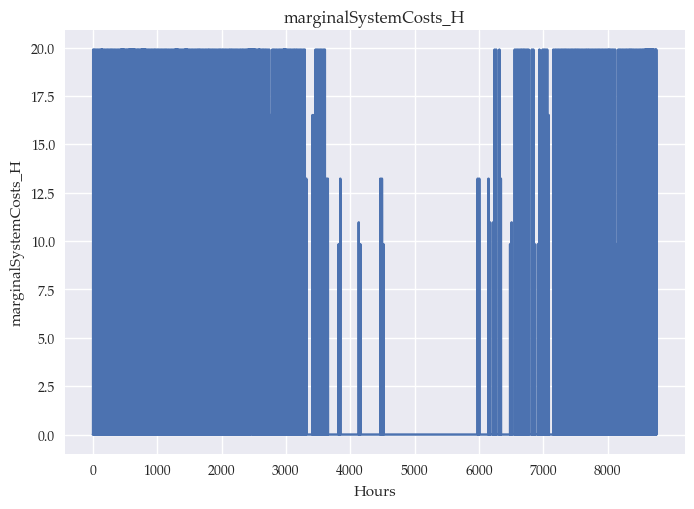

In [22]:
tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
base_db['marginalSystemCosts_H'].plot()
plt.xlabel('Hours')
plt.ylabel('marginalSystemCosts_H')
plt.xticks(tick_positions, tick_positions)
plt.title('marginalSystemCosts_H')
plt.show()

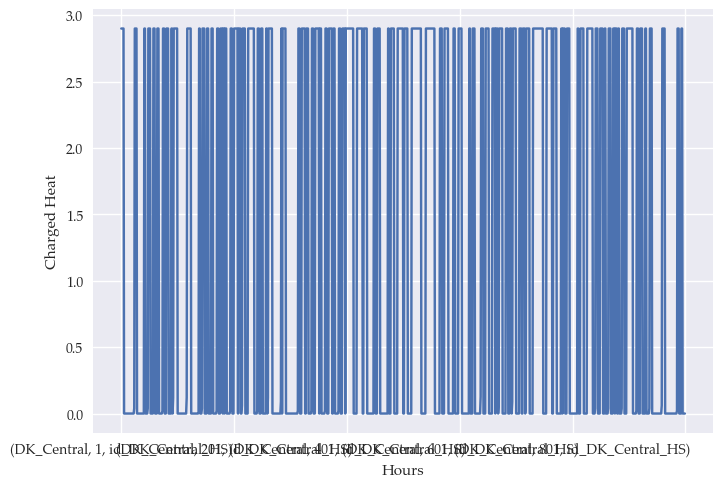

In [23]:
start_hour = 1
end_hour = 1000

# For axis names
tick_positions = range(0, 1000, 100)

# Filter the Series for the specified range of hours
filtered_series_charged_H = base_db['charge_H'][(base_db['charge_H'].index.get_level_values('h') >= start_hour) & (base_db['charge_H'].index.get_level_values('h') <= end_hour)]

# Plot the subset DataFrame
filtered_series_charged_H.plot()
plt.xlabel('Hours')
plt.ylabel('Charged Heat')
#plt.xticks(tick_positions, tick_positions)
plt.show()

<Axes: xlabel='g_H,h,id'>

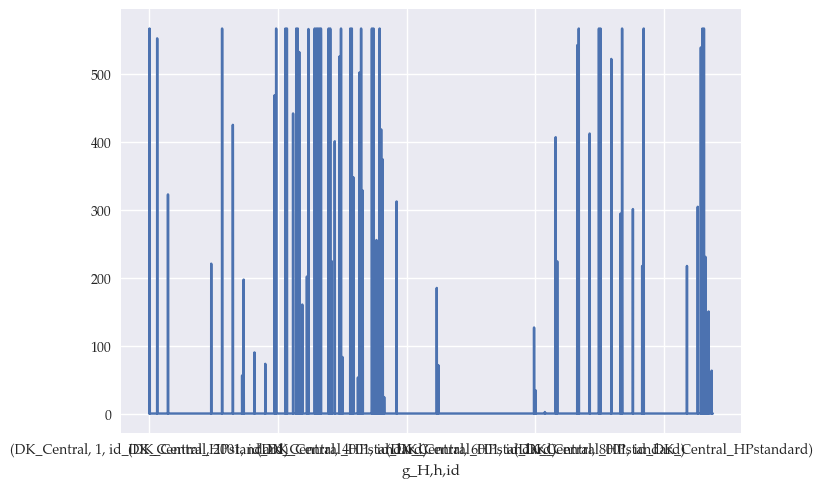

In [25]:
base_db['Generation_H'][(base_db['Generation_H'].index.get_level_values('id') == 'id_DK_Central_HPstandard')].plot()

## Increase Storage Capacity

These are the baseline storage capacities:

In [26]:
base_db['sCap']

id
id_DK_Central_HS    175.0
Name: sCap, dtype: float64

In the following, we will run an experiment where we are exogenously increase the capacity of the storage technology from the baseline levels. We will assume the same storage duration of **60.344828 hours** as in the baseline scenario.

We will also be extracting the following variables:

In [ ]:
extract = ['marginalSystemCosts_E','marginalSystemCosts_H','stored_H','Welfare','Emissions', 'marginalEconomicValue', 'meanConsumerPrice_E', 'meanConsumerPrice_H']

In [ ]:
# Setting
E2H = 60.344828 # The "energy storage to heat"-ratio/storage duration
maxcap = base_db['GeneratingCap_H']*2
loop = pd.Index(range(5), name = 'loop')
v0_GCap = pd.Series(base_db['GeneratingCap_H'], index = getTechs(['HS'],m.db))
vT_GCap = pd.Series(maxcap, index = v0_GCap.index)
v0_SCap = v0_GCap.mul(E2H)
vT_SCap = vT_GCap.mul(E2H)

grid_GCap = adjMultiIndex.addGrid(v0_GCap,vT_GCap,loop,'GeneratingCapacity').astype(int)
grid_SCap = adjMultiIndex.addGrid(v0_SCap,vT_SCap,loop,'sCap').astype(int)

In [ ]:
grid_GCap

In [ ]:
grid_SCap

We now run the counterfactual scenarios:

In [ ]:
solution = m.loopSolveExtract(loop, [grid_GCap, grid_SCap], extract)

In [ ]:
solution['stored_H']

In [ ]:
%%capture
loop_id=loop[[0,1,2,3,4]]

In [ ]:
# Calculate tick positions for every 1000
tick_positions = range(0,  8761, 1000)

# Plot the subset Series
adj.rc_pd(solution['stored_H'],loop_id).unstack('loop').plot()
plt.xlabel('Hours')
plt.ylabel('Stored Heat')
plt.xticks(tick_positions,tick_positions)
plt.title('Counterfactual Scenario DK_Central')
plt.show()

In [ ]:
start_hour = 1
end_hour = 1000

# Filter the Series for the specified range of hours
filtered_series = solution['stored_H'][(solution['stored_H'].index.get_level_values('h') >= start_hour) & (solution['stored_H'].index.get_level_values('h') <= end_hour)]

# Calculate tick positions for every 1000
tick_positions = range(0,  1000, 100)

# Plot the subset Series
adj.rc_pd(filtered_series,loop_id).unstack('loop').plot()
plt.xlabel('Hours')
plt.ylabel('Stored Heat')
plt.xticks(tick_positions,tick_positions)
plt.title('Counterfactual Scenario DK_Central')
plt.show()

In [ ]:
tick_positions

What to plot?

- CO2 Emissions
- Usage of Storage
- Marginal Economic value of storage
- seasonal storage?